In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize']=10,6


In [20]:
# https://www.kaggle.com/datasets/shenba/time-series-datasets?resource=download&select=sales-of-shampoo-over-a-three-ye.csv
dataset = pd. read_csv("/content/sample_data/sales-of-shampoo-over-a-three-ye.csv")
dataset.head()
# dataset.describe()

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


In [25]:
dataset['Month'] = pd.to_datetime(dataset['Month'], format='%d-%b')

# Set "Month" as the index
indexedDataset = dataset.set_index('Month')

print(indexedDataset)

            Sales of shampoo over a three year period
Month                                                
1900-01-01                                      266.0
1900-02-01                                      145.9
1900-03-01                                      183.1
1900-04-01                                      119.3
1900-05-01                                      180.3
1900-06-01                                      168.5
1900-07-01                                      231.8
1900-08-01                                      224.5
1900-09-01                                      192.8
1900-10-01                                      122.9
1900-11-01                                      336.5
1900-12-01                                      185.9
1900-01-02                                      194.3
1900-02-02                                      149.5
1900-03-02                                      210.1
1900-04-02                                      273.3
1900-05-02                  

In [26]:
indexedDataset.head(5)

,Sales of shampoo over a three year period
Month,
1900-01-01,266.0
1900-02-01,145.9
1900-03-01,183.1
1900-04-01,119.3
1900-05-01,180.3


In [27]:
indexedDataset.tail(5)

,Sales of shampoo over a three year period
Month,
1900-08-03,407.6
1900-09-03,682.0
1900-10-03,475.3
1900-11-03,581.3
1900-12-03,646.9


# **Step 2: Ploting the raw data**

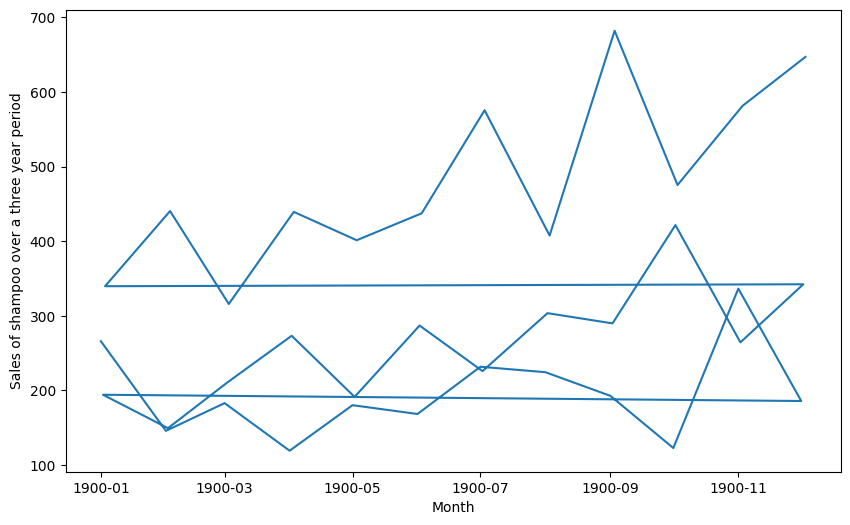

In [28]:
plt.xlabel("Month")
plt.ylabel("Sales of shampoo over a three year period")
plt.plot(indexedDataset)

# **Step - 3 : Check the stationarity of raw data**

a. Using Rolling Statistics

In [29]:
rollmean = indexedDataset.rolling(window=12).mean()
# rolling std at yearly level
rollstd = indexedDataset.rolling(window=12).std()
print(rollmean, rollstd)

            Sales of shampoo over a three year period
Month                                                
1900-01-01                                        NaN
1900-02-01                                        NaN
1900-03-01                                        NaN
1900-04-01                                        NaN
1900-05-01                                        NaN
1900-06-01                                        NaN
1900-07-01                                        NaN
1900-08-01                                        NaN
1900-09-01                                        NaN
1900-10-01                                        NaN
1900-11-01                                        NaN
1900-12-01                                 196.458333
1900-01-02                                 190.483333
1900-02-02                                 190.783333
1900-03-02                                 193.033333
1900-04-02                                 205.866667
1900-05-02                  

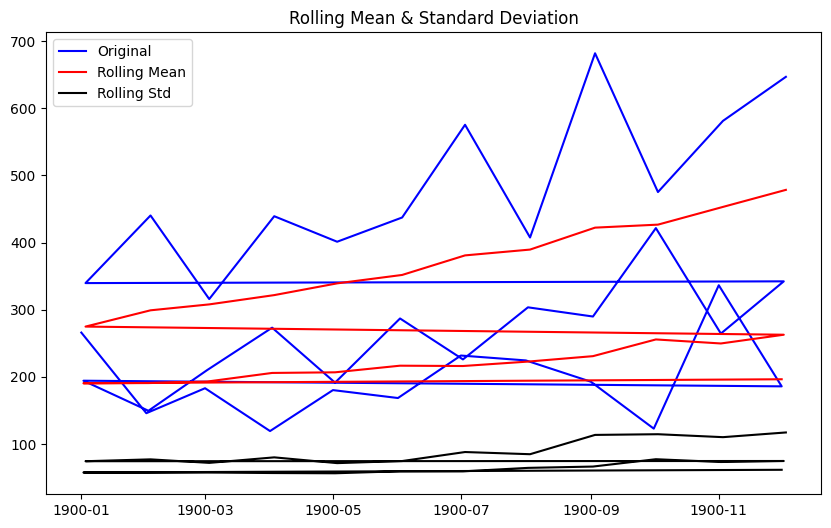

In [30]:
orig = plt.plot(indexedDataset, color = 'blue', label = "Original")
mean = plt.plot(rollmean, color = 'red', label = "Rolling Mean")
std = plt.plot(rollstd, color = 'black', label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

 Using Augmented Dicky-Fuller (ADF) Test

In [31]:
# Perform Dicky-Fuller Test
#import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey Fuller Test")
# Here AIC helps to analyse the exact value from actual values and difference between them
dftest = adfuller(indexedDataset['Sales of shampoo over a three year period'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
for key, value in dftest[4].items():
  dfoutput['Critical value (%s)'%key]= value

print(dfoutput)

Results of Dickey Fuller Test
Test statistic               3.060142
p-value                      1.000000
#Lags used                  10.000000
No. of observations used    25.000000
Critical value (1%)         -3.723863
Critical value (5%)         -2.986489
Critical value (10%)        -2.632800
dtype: float64


## **c.test_stationarity()**

In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  # Determinig Rolling statistics
  movingaverage = timeSeries.rolling(window=12).mean()
  movingSTD = timeSeries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeSeries, color = 'blue', label = "Original")
  mean = plt.plot(movingaverage, color = 'red', label = "Rolling Mean")
  std = plt.plot(movingSTD, color = 'black', label = "Rolling Std")
  plt.legend(loc = "best")
  plt.title("Rolling Mean & Standard Deviation")
  plt.show()

  # Perform Dickey-Fuller Test
  print("Results of Dickey Fuller Test")
  dftest = adfuller(timeSeries['Sales of shampoo over a three year period'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
  print(dfoutput)

# **Step - 4 : Perform transformation to incorporate stationarity**

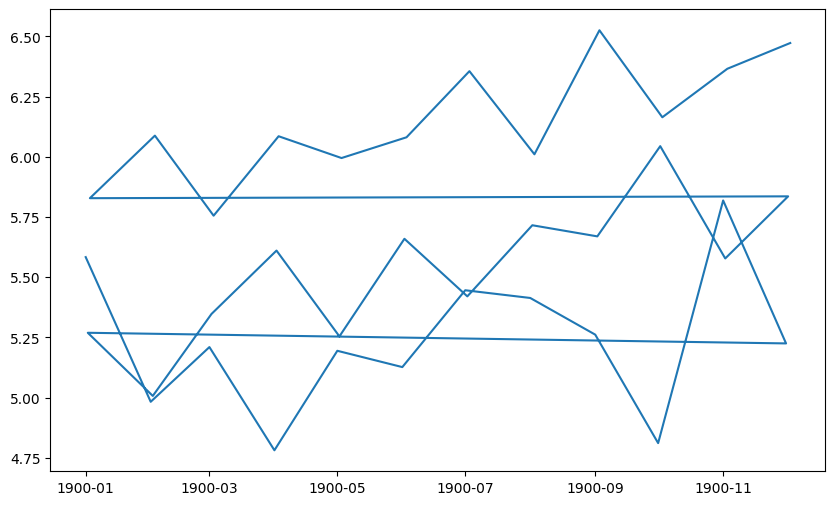

In [33]:

# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

Transformation - 1 : Subtracting Moving Average from LogScale Data
1(a) : Computation

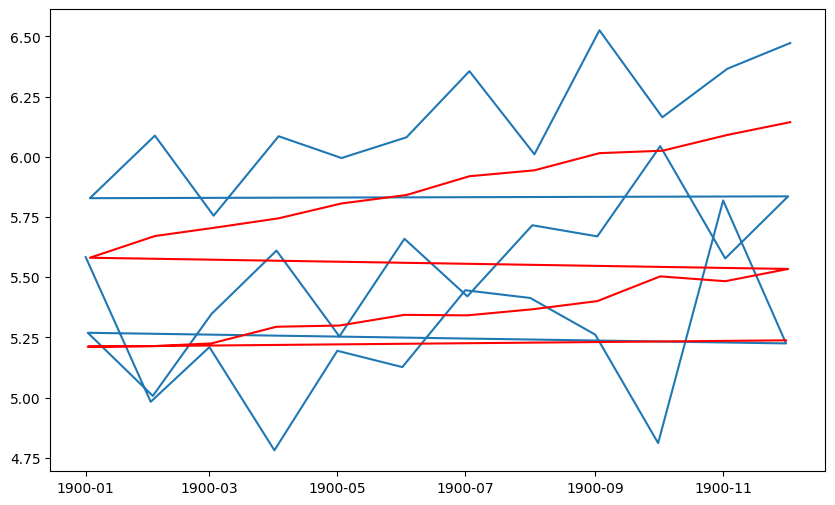

In [34]:
movingaverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingaverage, color='red')
#plt.plot(movingSTD, color='black')

In [35]:
dataLogScaleMinusMovingAverage = indexedDataset_logScale - movingaverage
dataLogScaleMinusMovingAverage.head(12)


,Sales of shampoo over a three year period
Month,
1900-01-01,NaN
1900-02-01,NaN
1900-03-01,NaN
1900-04-01,NaN
1900-05-01,NaN
1900-06-01,NaN
1900-07-01,NaN
1900-08-01,NaN
1900-09-01,NaN


In [36]:

#Remove NaN values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(18)

,Sales of shampoo over a three year period
Month,
1900-12-01,-0.012810
1900-01-02,0.057558
1900-02-02,-0.206580
1900-03-02,0.122245
1900-04-02,0.316154
1900-05-02,-0.045029
1900-06-02,0.315709
1900-07-02,0.078873
1900-08-02,0.348896


1(b) : Plotting

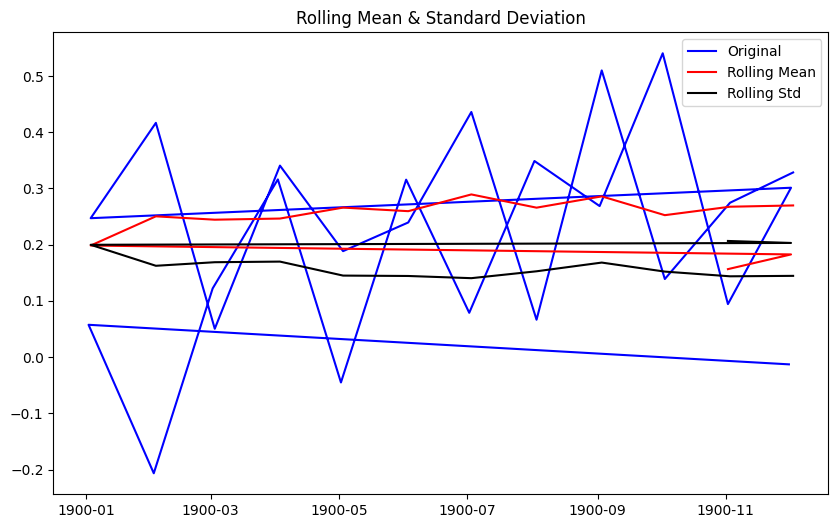

Results of Dickey Fuller Test
Test statistic              -2.866638
p-value                      0.049367
#Lags used                   8.000000
No. of observations used    16.000000
Critical value (1%)         -3.924019
Critical value (5%)         -3.068498
Critical value (10%)        -2.673893
dtype: float64


In [37]:
test_stationarity(dataLogScaleMinusMovingAverage)

Transformation - 2 : Subtrating Exponential Decay Weighted Average from LogScale Data

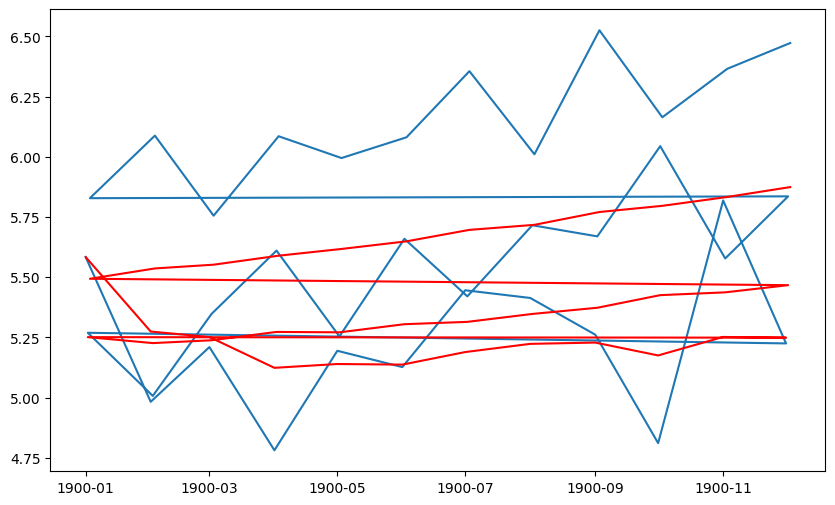

In [38]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')


In [39]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage

2(c) : Plotting

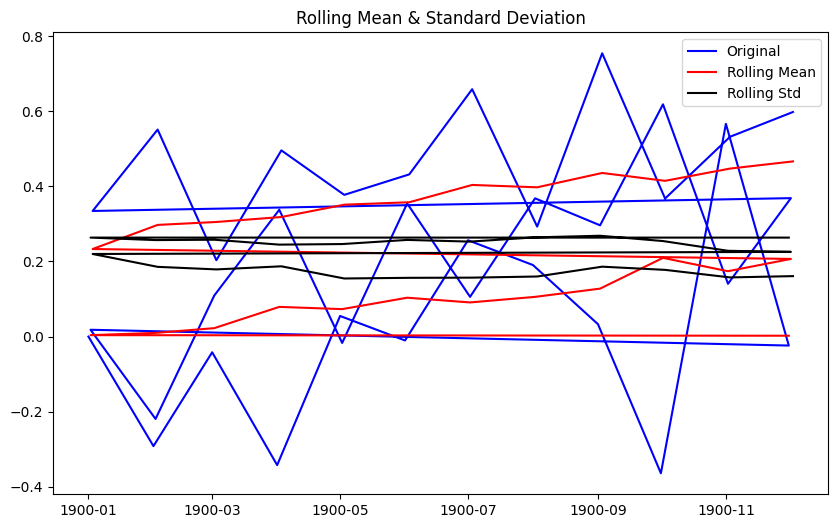

Results of Dickey Fuller Test
Test statistic              -0.945353
p-value                      0.772671
#Lags used                  10.000000
No. of observations used    25.000000
Critical value (1%)         -3.723863
Critical value (5%)         -2.986489
Critical value (10%)        -2.632800
dtype: float64


In [40]:

test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

# **Step - 5 : Understanding the Components of Time Series**

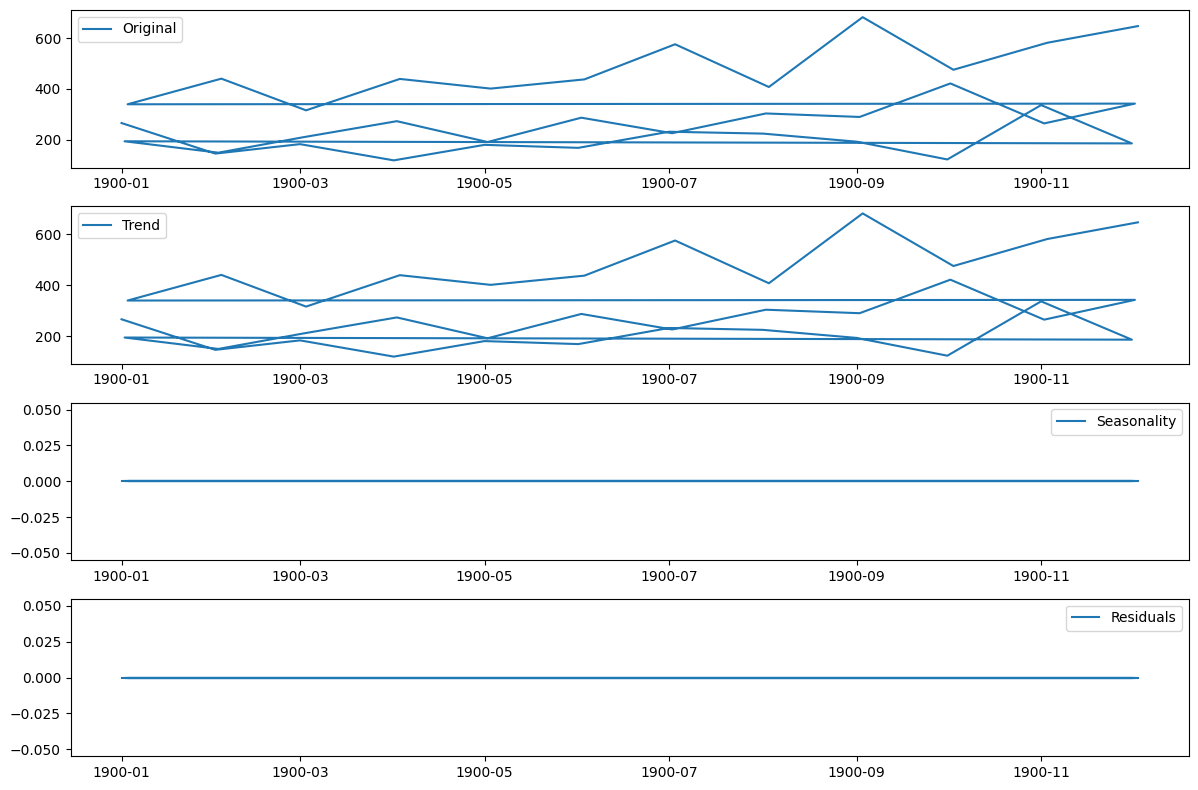

In [44]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(indexedDataset['Sales of shampoo over a three year period'], model='additive', period=1)  # Period is set to 1 for monthly data

# Get the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(indexedDataset['Sales of shampoo over a three year period'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# **Step - 6 : Check whether the noise is stationary or not**

In [45]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
print(decomposedLogData)

Month
1900-01-01    0.0
1900-02-01    0.0
1900-03-01    0.0
1900-04-01    0.0
1900-05-01    0.0
1900-06-01    0.0
1900-07-01    0.0
1900-08-01    0.0
1900-09-01    0.0
1900-10-01    0.0
1900-11-01    0.0
1900-12-01    0.0
1900-01-02    0.0
1900-02-02    0.0
1900-03-02    0.0
1900-04-02    0.0
1900-05-02    0.0
1900-06-02    0.0
1900-07-02    0.0
1900-08-02    0.0
1900-09-02    0.0
1900-10-02    0.0
1900-11-02    0.0
1900-12-02    0.0
1900-01-03    0.0
1900-02-03    0.0
1900-03-03    0.0
1900-04-03    0.0
1900-05-03    0.0
1900-06-03    0.0
1900-07-03    0.0
1900-08-03    0.0
1900-09-03    0.0
1900-10-03    0.0
1900-11-03    0.0
1900-12-03    0.0
Name: resid, dtype: float64


In [46]:
decomposedLogData.describe()

count    36.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: resid, dtype: float64

In [47]:

decomposedLogData.head(12)

Month
1900-01-01    0.0
1900-02-01    0.0
1900-03-01    0.0
1900-04-01    0.0
1900-05-01    0.0
1900-06-01    0.0
1900-07-01    0.0
1900-08-01    0.0
1900-09-01    0.0
1900-10-01    0.0
1900-11-01    0.0
1900-12-01    0.0
Name: resid, dtype: float64

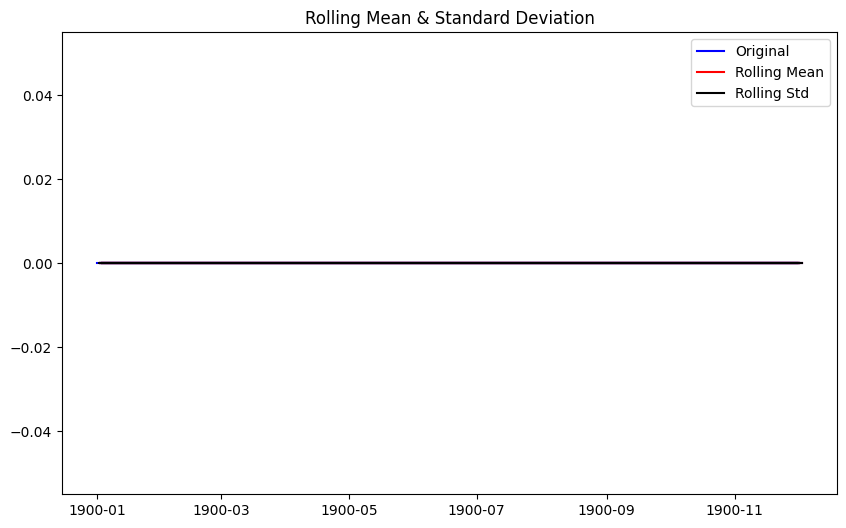

Results of Dickey Fuller Test


KeyError: 'Sales of shampoo over a three year period'

In [48]:
test_stationarity(decomposedLogData)

# **Step - 7 : Implement the AR Model**
7(a) : Plot the ACF and PACF graphs
for LogScale Data from whihc Exponential Decay Weighted Average is subtracted

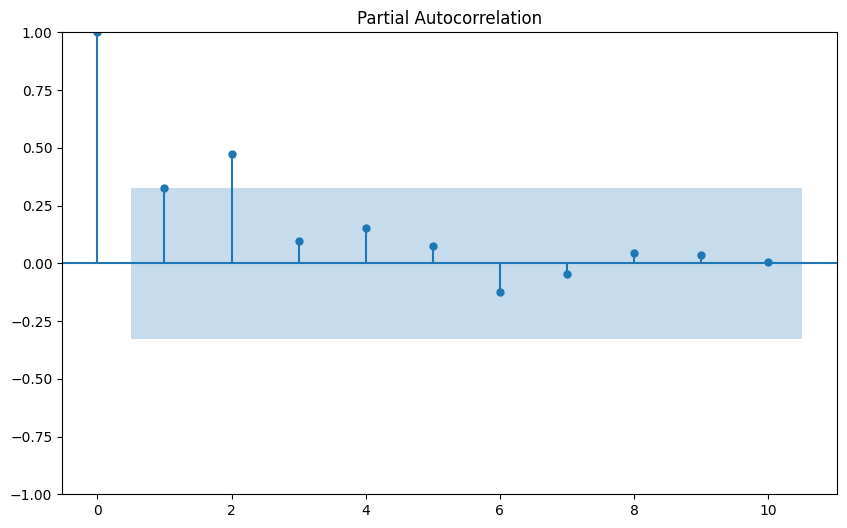

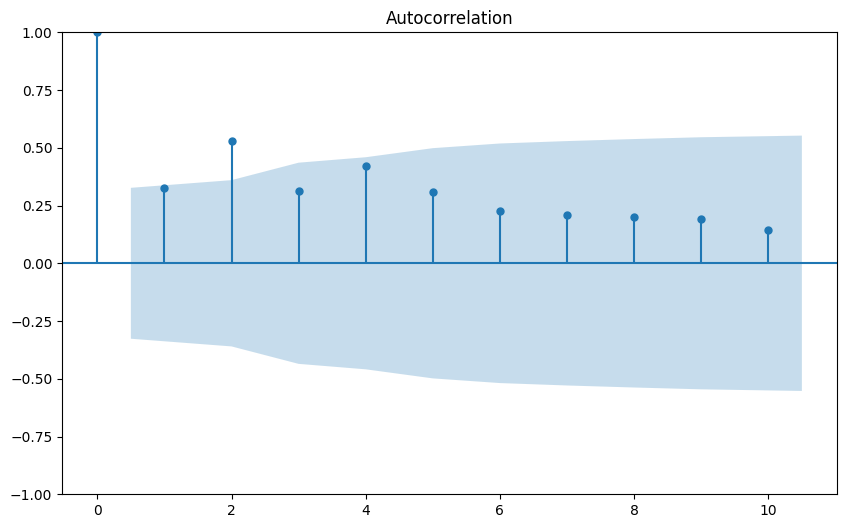

In [49]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)
acf=plot_acf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)

7(b) : Split the LogScale Data for Training & Testing
Training with 7 years data
Testing with 5 years data

In [50]:
train=datasetLogScaleMinusMovingExponentialDecayAverage[:len(datasetLogScaleMinusMovingExponentialDecayAverage)-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage[len(datasetLogScaleMinusMovingExponentialDecayAverage)-60:]

7(c) : Train the AR Model

In [51]:

from statsmodels.tsa.ar_model import AutoReg
# AR Model with p = 2 from PACF plot
model_1 = AutoReg(train, lags=1).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
print(model_1.summary())

                                        AutoReg Model Results                                        
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   12
Model:                                            AutoReg(1)   Log Likelihood                  -0.653
Method:                                      Conditional MLE   S.D. of innovations              0.257
Date:                                       Wed, 27 Mar 2024   AIC                              7.306
Time:                                               05:46:16   BIC                              8.500
Sample:                                           02-01-1900   HQIC                             6.554
                                                - 12-01-1900                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

7(d) : Test the AR Model

In [53]:
pred=model_1.predict(start=len(train),end=len(datasetLogScaleMinusMovingExponentialDecayAverage)-1, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [54]:
print(len(train))

12


In [55]:
print(pred)

1901-01-01    0.008956
1901-02-01    0.001552
1901-03-01    0.003223
1901-04-01    0.002846
1901-05-01    0.002931
1901-06-01    0.002912
1901-07-01    0.002916
1901-08-01    0.002915
1901-09-01    0.002915
1901-10-01    0.002915
1901-11-01    0.002915
1901-12-01    0.002915
1902-01-01    0.002915
1902-02-01    0.002915
1902-03-01    0.002915
1902-04-01    0.002915
1902-05-01    0.002915
1902-06-01    0.002915
1902-07-01    0.002915
1902-08-01    0.002915
1902-09-01    0.002915
1902-10-01    0.002915
1902-11-01    0.002915
1902-12-01    0.002915
Freq: MS, dtype: float64


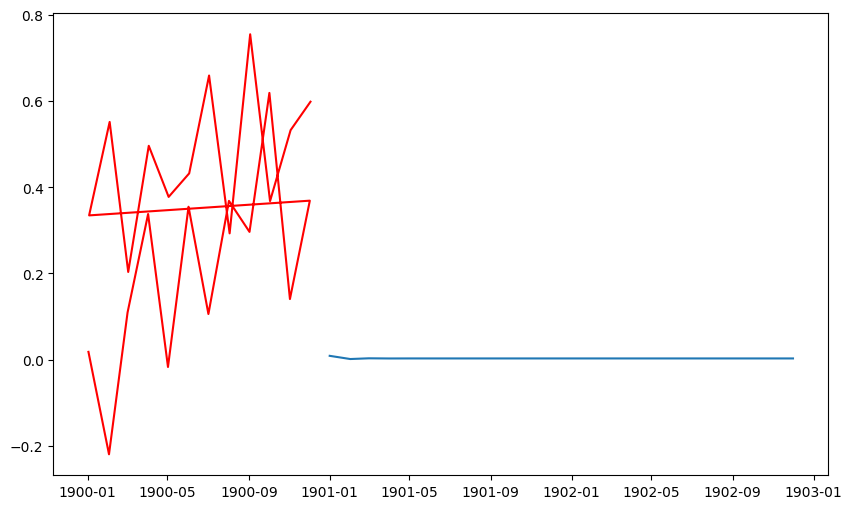

In [56]:
plt.plot(pred)
plt.plot(test, color='red')

7(e) : Calculate the Error

In [57]:

from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)


0.404244169880066


In [58]:

pred_future=model_1.predict(start=len(datasetLogScaleMinusMovingExponentialDecayAverage)+1, end=len(datasetLogScaleMinusMovingExponentialDecayAverage)+60, dynamic=False)
print("Prediction for next 5 years")
print(pred_future)
print("No. of predictions : \t", len(pred_future))

Prediction for next 5 years
1903-02-01    0.002915
1903-03-01    0.002915
1903-04-01    0.002915
1903-05-01    0.002915
1903-06-01    0.002915
1903-07-01    0.002915
1903-08-01    0.002915
1903-09-01    0.002915
1903-10-01    0.002915
1903-11-01    0.002915
1903-12-01    0.002915
1904-01-01    0.002915
1904-02-01    0.002915
1904-03-01    0.002915
1904-04-01    0.002915
1904-05-01    0.002915
1904-06-01    0.002915
1904-07-01    0.002915
1904-08-01    0.002915
1904-09-01    0.002915
1904-10-01    0.002915
1904-11-01    0.002915
1904-12-01    0.002915
1905-01-01    0.002915
1905-02-01    0.002915
1905-03-01    0.002915
1905-04-01    0.002915
1905-05-01    0.002915
1905-06-01    0.002915
1905-07-01    0.002915
1905-08-01    0.002915
1905-09-01    0.002915
1905-10-01    0.002915
1905-11-01    0.002915
1905-12-01    0.002915
1906-01-01    0.002915
1906-02-01    0.002915
1906-03-01    0.002915
1906-04-01    0.002915
1906-05-01    0.002915
1906-06-01    0.002915
1906-07-01    0.002915
1906-0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Step - 8 : Implement ARIMA Model

8(a) : Deriving the parameters of ARIMA Models
Note :

ARIMA model consists of 3 models
AR (Autoregression) model
Integration
MA (Movung Average) model
ARIMA Model has 3 parameters
p : autoregressive lags
d : order of differnetiation (# times a time series is differentiated)
q : moving average
8(a) - 1 : Compute d value
Differentiate the LogScale Data by 1 ie. d = 1

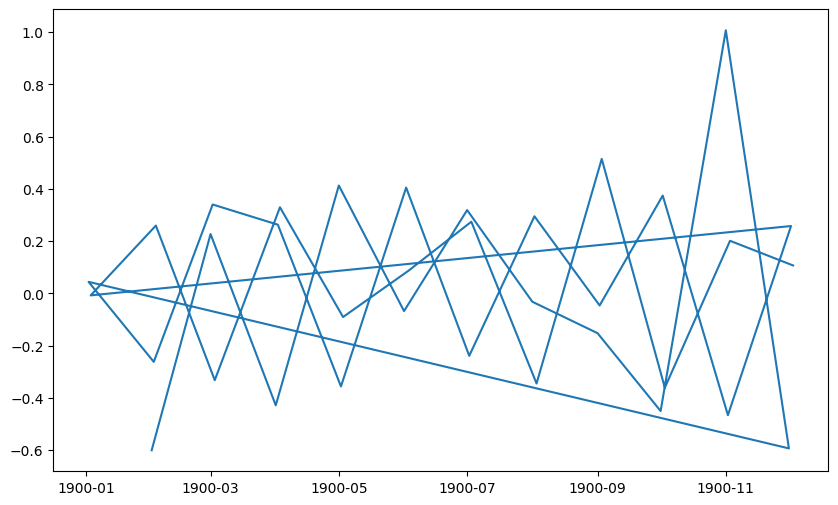

In [59]:

datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

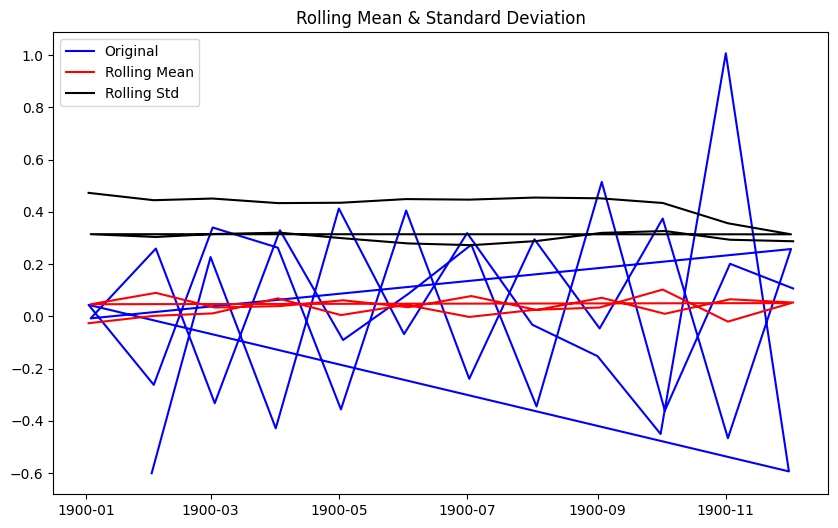

Results of Dickey Fuller Test
Test statistic              -2.168202
p-value                      0.217988
#Lags used                  10.000000
No. of observations used    24.000000
Critical value (1%)         -3.737709
Critical value (5%)         -2.992216
Critical value (10%)        -2.635747
dtype: float64


In [60]:

datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

8(a)-2 : Compute p & q values
Autocorrelation Function (ACF) Graph : To find q value
Partial Autocorrelation Function (PACF) Graph : To compute p value

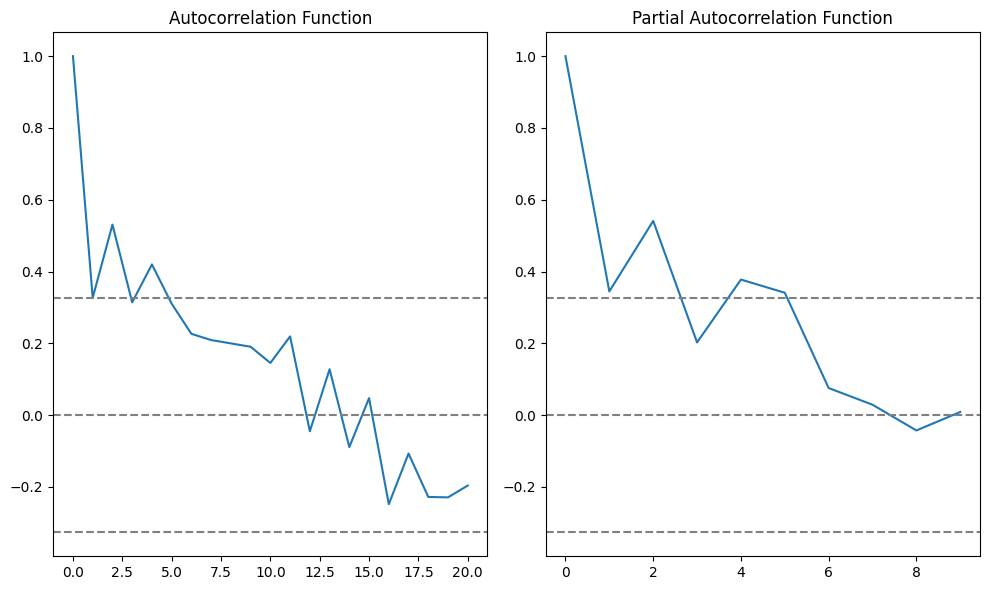

In [62]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined datasetLogScaleMinusMovingExponentialDecayAverage

# Calculate ACF and PACF
lag_acf = acf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=9, method='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

plt.show()

8(b) : Compute the Models
8(b) - 1 : AR Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Month
1900-01-01    0.224555
1900-02-01    0.132551
1900-03-01    0.005813
1900-04-01   -0.110582
1900-05-01   -0.026594
1900-06-01   -0.121074
1900-07-01    0.087562
1900-08-01    0.099963
1900-09-01    0.236103
1900-10-01    0.170722
1900-11-01    0.010936
1900-12-01   -0.039905
1900-01-02    0.369166
1900-02-02    0.049013
1900-03-02    0.029091
1900-04-02   -0.042869
1900-05-02    0.181179
1900-06-02    0.243365
1900-07-02    0.114179
1900-08-02    0.275095
1900-09-02    0.184809
1900-10-02    0.317365
1900-11-02    0.336153
1900-12-02    0.427981
1900-01-03    0.204205
1900-02-03    0.324598
1900-03-03    0.345129
1900-04-03    0.402087
1900-05-03    0.262241
1900-06-03    0.403027
1900-07-03    0.347185
1900-08-03    0.418797
1900-09-03    0.478072
1900-10-03    0.359019
1900-11-03    0.544801
1900-12-03    0.360025
dtype: float64
RSS: 1.886956
Plotting AR Model


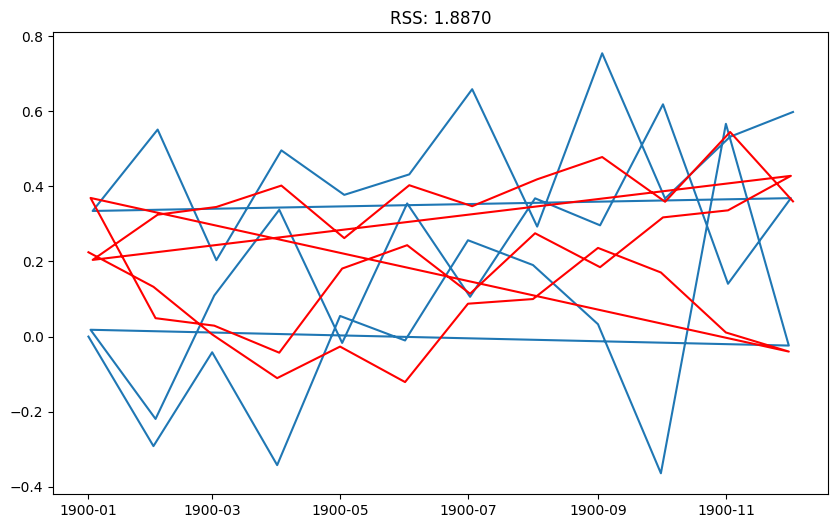

In [64]:

from statsmodels.tsa.arima.model import ARIMA
# AR Model
model_0 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,0))
results_AR = model_0.fit()
print(results_AR.fittedvalues)
print('RSS: %f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Sales of shampoo over a three year period'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Sales of shampoo over a three year period'])**2))
print("Plotting AR Model")

8(b) - 3 : ARMA Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Month
1900-01-01    0.214963
1900-02-01    0.101509
1900-03-01   -0.020126
1900-04-01   -0.139568
1900-05-01   -0.063981
1900-06-01   -0.188103
1900-07-01   -0.035354
1900-08-01   -0.042672
1900-09-01    0.102558
1900-10-01    0.113402
1900-11-01    0.075416
1900-12-01   -0.095109
1900-01-02    0.242508
1900-02-02    0.050545
1900-03-02    0.082291
1900-04-02   -0.049012
1900-05-02    0.063669
1900-06-02    0.163644
1900-07-02    0.068200
1900-08-02    0.219611
1900-09-02    0.139036
1900-10-02    0.260677
1900-11-02    0.251679
1900-12-02    0.409584
1900-01-03    0.250055
1900-02-03    0.335275
1900-03-03    0.313605
1900-04-03    0.415640
1900-05-03    0.293804
1900-06-03    0.405068
1900-07-03    0.360997
1900-08-03    0.398079
1900-09-03    0.493734
1900-10-03    0.376746
1900-11-03    0.558336
1900-12-03    0.421208
dtype: float64
RSS: 1.692777
Plotting ARIMA Model


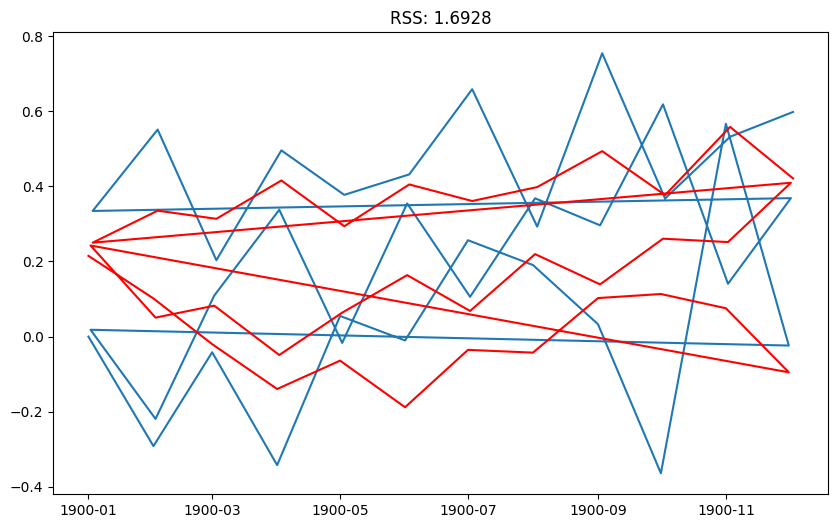

In [65]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA Model
model_03 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,2))
results_ARMA = model_03.fit()
print(results_ARMA.fittedvalues)
print('RSS: %f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Sales of shampoo over a three year period'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Sales of shampoo over a three year period'])**2))
print("Plotting ARIMA Model")

8(c) : Install the pmdarima package

In [66]:

!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.1 MB/s eta 0:00:00


In [67]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [68]:

stepwise_fit=auto_arima(indexedDataset_logScale, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9.187, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=31.566, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11.414, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8.154, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29.741, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6.022, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7.917, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7.236, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6.056, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12.021, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11.140, Time=0.12 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.075 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 1)   Log Likelihood                   0.989
Date:                Wed, 27 Mar 2024   AIC                              6.022
Time:                        05:50:07   BIC                             12.244
Sample:                             0   HQIC                             8.170
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0529      0.016      3.390      0.001       0.022       0.084
ar.L1         -0.4195      0.269     -1.560      0.119      -0.947       0.108
ma.L1         -0.7548      0.198     -3.810      0.000      -1.143      -0.366
sigma2         0.0529      0.013      4.151      0.000       0.028       0.078
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 2.79
Prob(Q):                              0.44   Prob(JB):                         0.25
Heteroskedasticity (H):               0.21   Skew:                            -0.68
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Month
1900-01-01    0.000000
1900-02-01    0.000000
1900-03-01   -0.084955
1900-04-01   -0.184794
1900-05-01   -0.084207
1900-06-01   -0.230346
1900-07-01   -0.138110
1900-08-01   -0.157314
1900-09-01    0.010223
1900-10-01    0.254057
1900-11-01    0.364570
1900-12-01    0.024718
1900-01-02    0.067419
1900-02-02   -0.177852
1900-03-02    0.016502
1900-04-02    0.141551
1900-05-02    0.029823
1900-06-02    0.131773
1900-07-02   -0.119283
1900-08-02    0.290345
1900-09-02    0.231007
1900-10-02    0.422965
1900-11-02    0.231004
1900-12-02    0.451790
1900-01-03    0.313671
1900-02-03    0.436704
1900-03-03    0.300233
1900-04-03    0.385308
1900-05-03    0.280362
1900-06-03    0.439749
1900-07-03    0.453380
1900-08-03    0.376880
1900-09-03    0.572739
1900-10-03    0.369994
1900-11-03    0.659397
1900-12-03    0.523666
dtype: float64
RSS: 1.247611
Plotting ARIMA Model


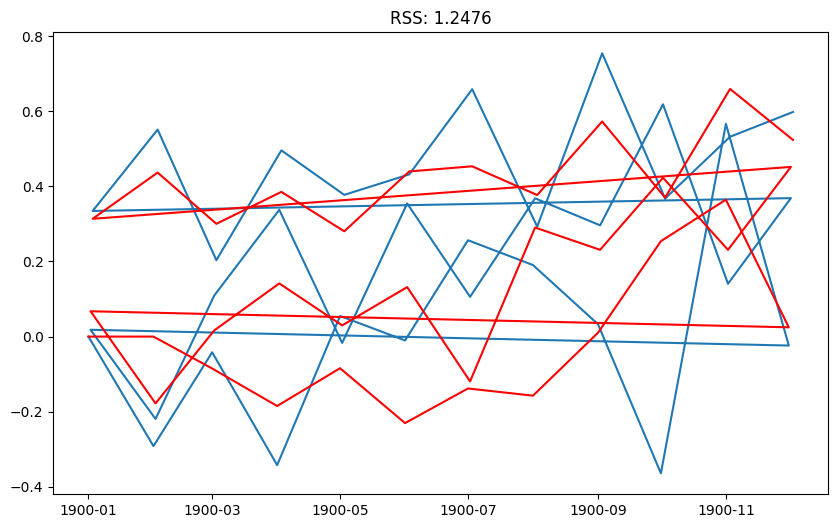

In [69]:

from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_2 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(4,1,3))
results_ARIMA = model_2.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Sales of shampoo over a three year period'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Sales of shampoo over a three year period'])**2))
print("Plotting ARIMA Model")

8(d) : Prepare the fitted values for predictions

Month
1900-02-01    0.000000
1900-03-01   -0.600575
1900-04-01   -0.450240
1900-05-01    0.006477
1900-06-01   -0.470203
1900-07-01   -0.173945
1900-08-01   -0.598962
1900-09-01   -0.396138
1900-10-01    0.067534
1900-11-01    0.952160
1900-12-01   -0.365032
1900-01-02    0.328856
1900-02-02   -0.272643
1900-03-02    0.201200
1900-04-02   -0.010388
1900-05-02   -0.198263
1900-06-02    0.181345
1900-07-02   -0.496756
1900-08-02    0.119365
1900-09-02   -0.109356
1900-10-02    0.148040
1900-11-02   -0.378672
1900-12-02    0.341073
1900-01-03   -0.017568
1900-02-03    0.175023
1900-03-03   -0.203019
1900-04-03    0.243284
1900-05-03   -0.241092
1900-06-03    0.101117
1900-07-03    0.064790
1900-08-03   -0.246044
1900-09-03    0.321163
1900-10-03   -0.395733
1900-11-03    0.335864
1900-12-03    0.057720
dtype: float64
RSS: 2.905436
Plotting ARIMA Model


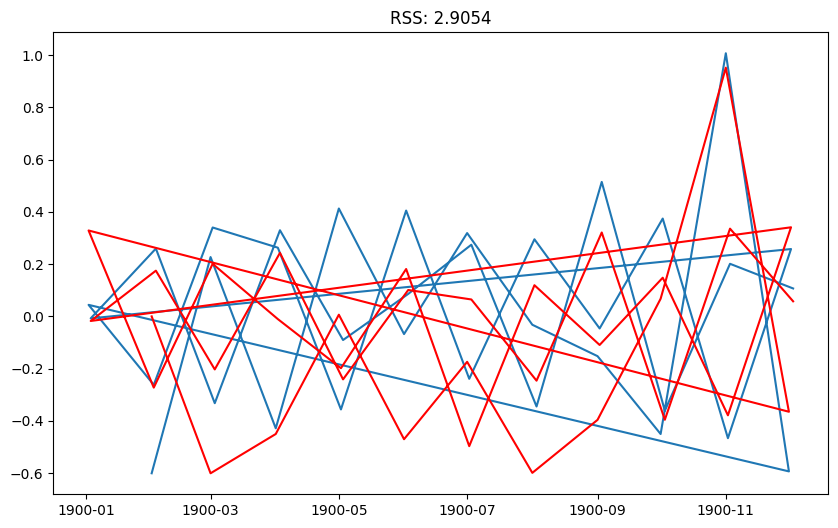

In [71]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model with
model_3 = ARIMA(datasetLogDiffShifting, order=(4,1,3))
results_ARIMA = model_3.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Sales of shampoo over a three year period'])**2))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Sales of shampoo over a three year period'])**2))
print("Plotting ARIMA Model")

8(d) - 1 : Convert the fitted values into a Series Format

In [72]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1900-02-01    0.000000
1900-03-01   -0.600575
1900-04-01   -0.450240
1900-05-01    0.006477
1900-06-01   -0.470203
dtype: float64



8(d)- 2 : Find the Cummulative Sum and find the predictions for the fitted values



In [73]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1900-02-01    0.000000
1900-03-01   -0.600575
1900-04-01   -1.050814
1900-05-01   -1.044337
1900-06-01   -1.514541
dtype: float64


In [74]:
predictiona_ARIMA_log = pd.Series(indexedDataset_logScale['Sales of shampoo over a three year period'].iloc[0],index = indexedDataset_logScale.index)
predictiona_ARIMA_log = predictiona_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictiona_ARIMA_log.head()

Month
1900-01-01    5.583496
1900-01-02    3.883429
1900-01-03    3.390804
1900-02-01    5.583496
1900-02-02    3.610785
dtype: float64

8(d)-3 : Perform Exponential of the data to bring it to original form

In [75]:

predictions_ARIMA = np.exp(predictiona_ARIMA_log)


8(d)-4: Plot the predictions made by ARIMA Model over the original Data

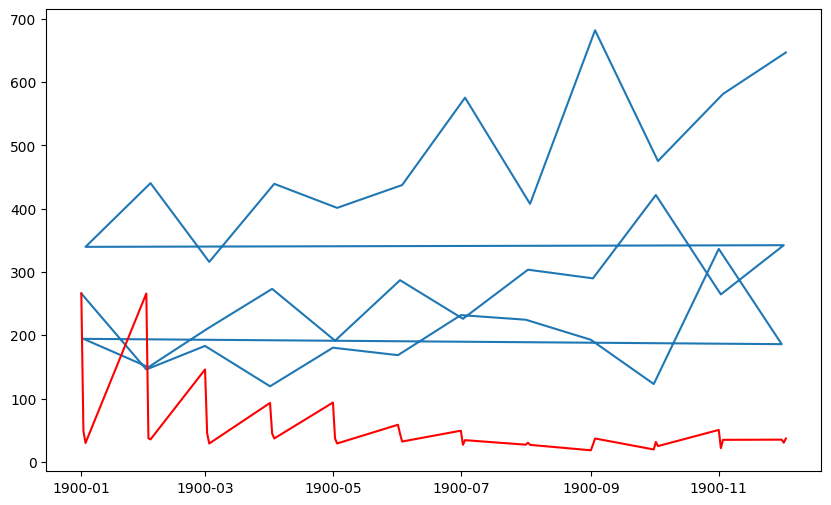

In [76]:
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA, color='red')

8(e) : Predictions for 2 years

In [77]:
indexedDataset_logScale

,Sales of shampoo over a three year period
Month,
1900-01-01,5.583496
1900-02-01,4.982921
1900-03-01,5.210032
1900-04-01,4.781641
1900-05-01,5.194622
1900-06-01,5.126936
1900-07-01,5.445875
1900-08-01,5.413876
1900-09-01,5.261653


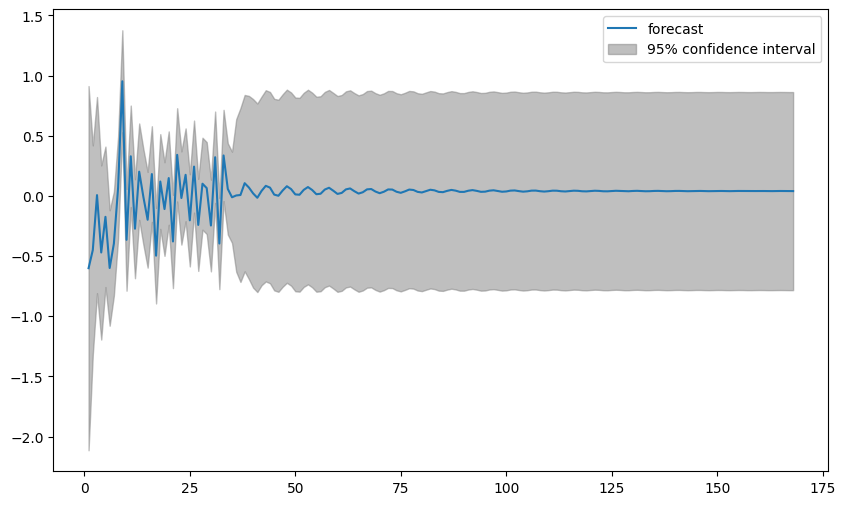

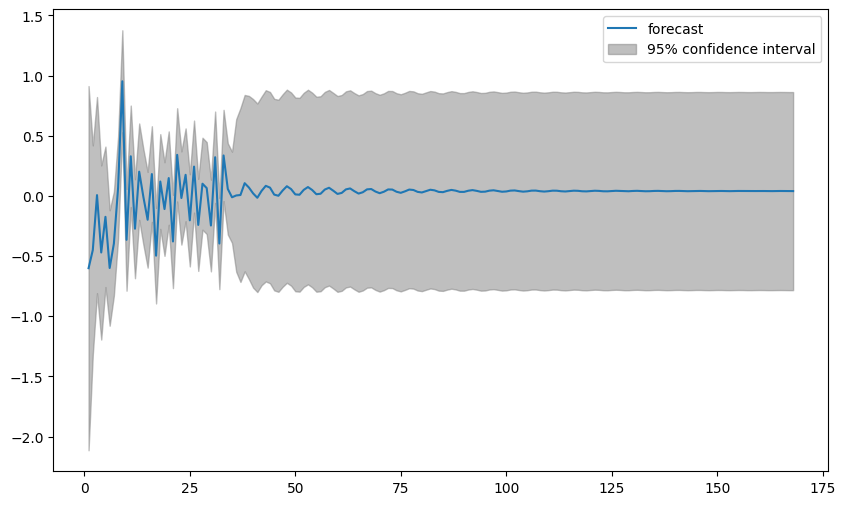

In [78]:
from statsmodels.graphics.tsaplots import plot_predict
# We have 144 rows + 24 to be predictions
plot_predict(results_ARIMA,1,168)

In [79]:
results_ARIMA.forecast(steps=24)

35   -0.011450
36    0.003517
37    0.007320
38    0.105646
39    0.069575
40    0.020795
41   -0.015745
42    0.041163
43    0.083487
44    0.068749
45    0.010658
46    0.001040
47    0.044402
48    0.080308
49    0.056517
50    0.012389
51    0.009577
52    0.049991
53    0.073505
54    0.049009
55    0.013771
56    0.017938
57    0.052710
58    0.067519
Name: predicted_mean, dtype: float64

Approach - 2

In [80]:
from statsmodels.tsa.arima.model import ARIMA
print(datasetLogScaleMinusMovingExponentialDecayAverage.shape)
train=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[:-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[-60:]
print(train.shape,test.shape)

(36, 1)
(0, 1) (36, 1)
